#### Authentication

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import regex as re
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pandas import json_normalize
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

In [2]:
secrets_file = open("secrets.txt","r")

In [3]:
string = secrets_file.read()

In [4]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

#### authentication with secrets

In [43]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

# Extracting Large Playlists from spotify

- https://open.spotify.com/playlist/1QfbJBydxHUJuQ0DeNNZTm - 8389 (Throwing error when json_normalize) so don't use
- https://open.spotify.com/playlist/5xqpyfZyS1DVysoevdVyEn - 10,991
- https://open.spotify.com/playlist/5S8SJdl1BDc0ugpkEvFsIL - 10,000
- https://open.spotify.com/playlist/5oZjXwvrbAJ29Beza3h1bn - 10,000 (also throwing error json_normalize)
- https://open.spotify.com/playlist/6yPiKpy7evrwvZodByKvM9 - 10,000
- https://open.spotify.com/playlist/6FKDzNYZ8IW1pvYVF4zUN2 - 10,000

In [6]:
# # we will need more songs for our clustering

# playlist1 = sp.user_playlist_tracks("spotify", "5xqpyfZyS1DVysoevdVyEn")
# playlist2 = sp.user_playlist_tracks("spotify", "5S8SJdl1BDc0ugpkEvFsIL")
# playlist3 = sp.user_playlist_tracks("spotify", "6yPiKpy7evrwvZodByKvM9")
# playlist4 = sp.user_playlist_tracks("spotify", "6FKDzNYZ8IW1pvYVF4zUN2")
# playlist5 = sp.user_playlist_tracks("spotify", "3Ho3iO0iJykgEQNbjB2sic") #rock hits
# playlist6 = sp.user_playlist_tracks("spotify", "6YlB8RiNTzuauYKlR0zg11") #rock hits

In [9]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000) # respectful nap
    return tracks

In [11]:
# this will take at least around num_pages_in_playlist * (avg_sleep_time + processing_time) = 53 * (2+0.1) = 110 seconds

all_tracks1 = get_playlist_tracks("5xqpyfZyS1DVysoevdVyEn")
all_tracks2 = get_playlist_tracks("5S8SJdl1BDc0ugpkEvFsIL")
all_tracks3 = get_playlist_tracks("6yPiKpy7evrwvZodByKvM9")
all_tracks4 = get_playlist_tracks("6FKDzNYZ8IW1pvYVF4zUN2")

In [12]:
all_tracks5 = get_playlist_tracks("0R8V9dDuScYJ8zIUPHVj1b")
all_tracks6 = get_playlist_tracks("3Ho3iO0iJykgEQNbjB2sic")
all_tracks7 = get_playlist_tracks("6YlB8RiNTzuauYKlR0zg11")
all_tracks8 = get_playlist_tracks("4rnleEAOdmFAbRcNCgZMpY")

In [13]:
tracks1 = json_normalize(all_tracks1)
tracks2 = json_normalize(all_tracks2)
tracks3 = json_normalize(all_tracks3)
tracks4 = json_normalize(all_tracks4)

In [14]:
tracks5 = json_normalize(all_tracks5)
tracks6 = json_normalize(all_tracks6)
tracks7 = json_normalize(all_tracks7)
tracks8 = json_normalize(all_tracks8)

In [15]:
tracks2.head()

,added_at,is_local,primary_color,added_by.external_urls.spotify,added_by.href,added_by.id,added_by.type,added_by.uri,track.album.album_type,track.album.artists,...,track.id,track.is_local,track.name,track.popularity,track.preview_url,track.track,track.track_number,track.type,track.uri,video_thumbnail.url
0,2017-11-20T02:52:18Z,False,None,https://open.spotify.com/user/twgeb7mzdcv4u8h1...,https://api.spotify.com/v1/users/twgeb7mzdcv4u...,twgeb7mzdcv4u8h191dxrvlpc,user,spotify:user:twgeb7mzdcv4u8h191dxrvlpc,single,[{'external_urls': {'spotify': 'https://open.s...,...,7zgqtptZvhf8GEmdsM2vp2,False,...Ready For It?,0,None,True,1,track,spotify:track:7zgqtptZvhf8GEmdsM2vp2,None
1,2017-11-20T02:42:15Z,False,None,https://open.spotify.com/user/twgeb7mzdcv4u8h1...,https://api.spotify.com/v1/users/twgeb7mzdcv4u...,twgeb7mzdcv4u8h191dxrvlpc,user,spotify:user:twgeb7mzdcv4u8h191dxrvlpc,album,[{'external_urls': {'spotify': 'https://open.s...,...,4Vxu50qVrQcycjRyJQaZLC,False,Life Changes,62,None,True,8,track,spotify:track:4Vxu50qVrQcycjRyJQaZLC,None
2,2017-11-20T02:36:40Z,False,None,https://open.spotify.com/user/twgeb7mzdcv4u8h1...,https://api.spotify.com/v1/users/twgeb7mzdcv4u...,twgeb7mzdcv4u8h191dxrvlpc,user,spotify:user:twgeb7mzdcv4u8h191dxrvlpc,album,[{'external_urls': {'spotify': 'https://open.s...,...,6b8Be6ljOzmkOmFslEb23P,False,24K Magic,82,https://p.scdn.co/mp3-preview/3a76820d510fa5f8...,True,1,track,spotify:track:6b8Be6ljOzmkOmFslEb23P,None
3,2017-12-06T01:26:36Z,False,None,https://open.spotify.com/user/twgeb7mzdcv4u8h1...,https://api.spotify.com/v1/users/twgeb7mzdcv4u...,twgeb7mzdcv4u8h191dxrvlpc,user,spotify:user:twgeb7mzdcv4u8h191dxrvlpc,album,[{'external_urls': {'spotify': 'https://open.s...,...,0afhq8XCExXpqazXczTSve,False,Galway Girl,81,https://p.scdn.co/mp3-preview/9b7635464dc2caea...,True,6,track,spotify:track:0afhq8XCExXpqazXczTSve,None
4,2017-11-20T02:36:14Z,False,None,https://open.spotify.com/user/twgeb7mzdcv4u8h1...,https://api.spotify.com/v1/users/twgeb7mzdcv4u...,twgeb7mzdcv4u8h191dxrvlpc,user,spotify:user:twgeb7mzdcv4u8h191dxrvlpc,album,[{'external_urls': {'spotify': 'https://open.s...,...,1HNkqx9Ahdgi1Ixy2xkKkL,False,Photograph,87,https://p.scdn.co/mp3-preview/d90f4e5f15d8ed41...,True,6,track,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,None


In [16]:
# we can even create a new column containing these DataFrames! KEEP song URI
def expand_list_dict(row):
    df = json_normalize(row['track.artists'])
    df['song_id'] = row['track.id']
    return df

# now we create a new dataframe with all these artists
def create_new_df(df):
    artist_df1 = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri'])
    #print(df['artists_dfs'])
    for mini_df in df['artists_dfs']:
        #display(mini_df)
        artist_df1 = pd.concat([artist_df1, mini_df], axis=0)
    return artist_df1

In [17]:

tracks1['artists_dfs'] = tracks1.apply(expand_list_dict, axis=1)
tracks2['artists_dfs'] = tracks2.apply(expand_list_dict, axis=1)
tracks3['artists_dfs'] = tracks3.apply(expand_list_dict, axis=1)
tracks4['artists_dfs'] = tracks4.apply(expand_list_dict, axis=1)

In [18]:
tracks5['artists_dfs'] = tracks5.apply(expand_list_dict, axis=1)
tracks6['artists_dfs'] = tracks6.apply(expand_list_dict, axis=1)
tracks7['artists_dfs'] = tracks7.apply(expand_list_dict, axis=1)
tracks8['artists_dfs'] = tracks8.apply(expand_list_dict, axis=1)

In [19]:
#artist dataframe contains a lot of dataframe

In [20]:
artist_track1 = create_new_df(tracks1)
artist_track2 = create_new_df(tracks2)
artist_track3 = create_new_df(tracks3)
artist_track4 = create_new_df(tracks4)

In [21]:
artist_track5 = create_new_df(tracks5)
artist_track6 = create_new_df(tracks6)
artist_track7 = create_new_df(tracks7)
artist_track8 = create_new_df(tracks8)

In [22]:
### Merging the dataframes into 1 big dataframe

In [23]:
df_merged1 = pd.merge(left=tracks1,
                    right=artist_track1,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')
df_merged1.head()

df_merged2 = pd.merge(left=tracks2,
                    right=artist_track2,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')

df_merged3 = pd.merge(left=tracks3,
                    right=artist_track3,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')

df_merged4 = pd.merge(left=tracks4,
                    right=artist_track4,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')

In [37]:
df_merged5 = pd.merge(left=tracks5,
                    right=artist_track5,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')

df_merged6 = pd.merge(left=tracks6,
                    right=artist_track6,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')

df_merged7 = pd.merge(left=tracks7,
                    right=artist_track7,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')

df_merged8 = pd.merge(left=tracks8,
                    right=artist_track8,
                    how='inner',
                    left_on='track.id',
                    right_on='song_id')

In [38]:
df_final1 = df_merged1[['track.name', 'name', 'song_id']]
df_final2 = df_merged2[['track.name', 'name', 'song_id']]
df_final3 = df_merged3[['track.name', 'name', 'song_id']]
df_final4 = df_merged4[['track.name', 'name', 'song_id']]
df_final5 = df_merged5[['track.name', 'name', 'song_id']]
df_final6 = df_merged6[['track.name', 'name', 'song_id']]
df_final7 = df_merged7[['track.name', 'name', 'song_id']]
df_final8 = df_merged8[['track.name', 'name', 'song_id']]

In [26]:
df_final4.shape
type(df_final4)

pandas.core.frame.DataFrame

In [39]:
spotify_songs = pd.concat([df_final1,df_final2,df_final3,df_final4,df_final5, df_final6, df_final7,df_final8], axis=0)
spotify_songs.shape

(76899, 3)

In [40]:
spotify_songs.drop_duplicates(inplace=True)

In [41]:
spotify_songs.shape

(62495, 3)

### Audio features

You can check here an explanation of the audio features: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [44]:
# probably let them figure this out in the lab :-)
chunks = [(i, i+100) for i in range(0, len(spotify_songs), 100)]
chunks
audio_features_list = []
for chunk in chunks:
    spotify_songs['song_id'] = spotify_songs['song_id'].astype(str)
    id_list100 = spotify_songs['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)
len(audio_features_list)

62495

In [45]:
audio_features_spotify = json_normalize(audio_features_list)

In [46]:
audio_features_spotify.drop_duplicates(inplace=True) # duplicates because some songs have more artists

In [47]:
audio_features_spotify.shape

(50872, 18)

In [48]:
spotify_w_audio_ft = pd.merge(left=spotify_songs,
                        right=audio_features_spotify,
                        how='inner',
                        left_on='song_id',
                        right_on='id')
spotify_w_audio_ft

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,If I Ever Feel Better,Phoenix,3AA8xNhDC0MpqwkGX3EP5V,0.755,0.553,6.0,-9.449,0.0,0.1070,0.04920,...,0.0646,0.836,119.700,audio_features,3AA8xNhDC0MpqwkGX3EP5V,spotify:track:3AA8xNhDC0MpqwkGX3EP5V,https://api.spotify.com/v1/tracks/3AA8xNhDC0Mp...,https://api.spotify.com/v1/audio-analysis/3AA8...,266600.0,4.0
1,Dance To The Underground,Radio 4,2i8lRhmZNKaM1ypHwRybuD,0.667,0.667,7.0,-6.267,1.0,0.0388,0.00013,...,0.0711,0.843,130.321,audio_features,2i8lRhmZNKaM1ypHwRybuD,spotify:track:2i8lRhmZNKaM1ypHwRybuD,https://api.spotify.com/v1/tracks/2i8lRhmZNKaM...,https://api.spotify.com/v1/audio-analysis/2i8l...,243213.0,4.0
2,How We Do,Mount Sims,4flxgPC0426CEeSrzQIic0,0.826,0.601,10.0,-3.966,0.0,0.0515,0.19500,...,0.0700,0.948,126.971,audio_features,4flxgPC0426CEeSrzQIic0,spotify:track:4flxgPC0426CEeSrzQIic0,https://api.spotify.com/v1/tracks/4flxgPC0426C...,https://api.spotify.com/v1/audio-analysis/4flx...,234000.0,4.0
3,Fuck the Pain Away,Peaches,1XHFob24QklIXtLRopKirJ,0.905,0.945,4.0,-2.630,1.0,0.1370,0.03540,...,0.0707,0.944,131.597,audio_features,1XHFob24QklIXtLRopKirJ,spotify:track:1XHFob24QklIXtLRopKirJ,https://api.spotify.com/v1/tracks/1XHFob24QklI...,https://api.spotify.com/v1/audio-analysis/1XHF...,250693.0,4.0
4,Street Surgery 2,Zongamin,4JB847zlgViLq8tJIzRsZy,0.797,0.536,11.0,-8.267,0.0,0.2660,0.03150,...,0.1700,0.704,102.881,audio_features,4JB847zlgViLq8tJIzRsZy,spotify:track:4JB847zlgViLq8tJIzRsZy,https://api.spotify.com/v1/tracks/4JB847zlgViL...,https://api.spotify.com/v1/audio-analysis/4JB8...,224800.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61726,deja vu,Olivia Rodrigo,61KpQadow081I2AsbeLcsb,0.439,0.610,9.0,-7.236,1.0,0.1160,0.59300,...,0.3410,0.172,181.088,audio_features,61KpQadow081I2AsbeLcsb,spotify:track:61KpQadow081I2AsbeLcsb,https://api.spotify.com/v1/tracks/61KpQadow081...,https://api.spotify.com/v1/audio-analysis/61Kp...,215508.0,4.0
61727,WHOLE LOTTA MONEY,BIA,5yorXJWdBan1Vlh116ZtQ7,0.897,0.371,1.0,-5.019,1.0,0.3680,0.09040,...,0.3250,0.441,81.008,audio_features,5yorXJWdBan1Vlh116ZtQ7,spotify:track:5yorXJWdBan1Vlh116ZtQ7,https://api.spotify.com/v1/tracks/5yorXJWdBan1...,https://api.spotify.com/v1/audio-analysis/5yor...,156005.0,4.0
61728,Slumber Party (feat. Princess Nokia),Ashnikko,11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11.0,-8.981,0.0,0.0795,0.00151,...,0.1010,0.563,105.012,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...,178405.0,4.0
61729,Slumber Party (feat. Princess Nokia),Princess Nokia,11ZulcYY4lowvcQm4oe3VJ,0.964,0.398,11.0,-8.981,0.0,0.0795,0.00151,...,0.1010,0.563,105.012,audio_features,11ZulcYY4lowvcQm4oe3VJ,spotify:track:11ZulcYY4lowvcQm4oe3VJ,https://api.spotify.com/v1/tracks/11ZulcYY4low...,https://api.spotify.com/v1/audio-analysis/11Zu...,178405.0,4.0


In [49]:
spotify_w_audio_ft.isna().sum()

track.name          0
name                0
song_id             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [56]:
spotify_w_audio_ft.to_csv('spotify_songs.csv', index=False)

## Extracting from Saved Spotify csv

In [50]:
# top_songs = pd.read_csv('top_songs.csv')
# spotify_songs = pd.read_csv('spotify_songs.csv')

In [57]:
spotify_songs_num = spotify_w_audio_ft.select_dtypes(include='number')

In [58]:
spotify_songs_num.shape

(61731, 13)

### Scaling the data as the values are in dissimilar range

In [60]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(spotify_songs_num)
X_prep = transformer.transform(spotify_songs_num)
print(type(transformer))
print(type(X_prep))

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'numpy.ndarray'>


In [61]:
X_prep

array([[ 1.04039095, -0.59109524,  0.20559537, ..., -0.07069691,
         0.13528656,  0.17438628],
       [ 0.54495488, -0.05982746,  0.4833901 , ...,  0.31193561,
        -0.00248605,  0.17438628],
       [ 1.44011779, -0.36740355,  1.31677428, ...,  0.19124839,
        -0.05675975,  0.17438628],
       ...,
       [ 2.21705163, -1.31343302,  1.59456901, ..., -0.59984732,
        -0.3842694 ,  0.17438628],
       [ 2.21705163, -1.31343302,  1.59456901, ..., -0.59984732,
        -0.3842694 ,  0.17438628],
       [ 0.4661355 , -0.72624231,  1.59456901, ..., -1.35790716,
        -0.49156791,  0.17438628]])

In [62]:
pd.DataFrame(X_prep,columns=spotify_songs_num.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.040391,-0.591095,0.205595,-0.498172,-1.260192,0.200124,-0.557392,-0.550499,-0.821806,1.539962,-0.070697,0.135287,0.174386
1,0.544955,-0.059827,0.483390,0.303864,0.793530,-0.529336,-0.738223,-0.557672,-0.782448,1.568110,0.311936,-0.002486,0.174386
2,1.440118,-0.367404,1.316774,0.883840,-1.260192,-0.393498,-0.020097,-0.570102,-0.789109,1.990334,0.191248,-0.056760,0.174386
3,1.884884,1.235720,-0.349994,1.220584,0.793530,0.521000,-0.608247,-0.553019,-0.784870,1.974250,0.357905,0.041579,0.174386
4,1.276849,-0.670319,1.594569,-0.200244,-1.260192,1.900770,-0.622619,-0.570019,-0.183605,1.009166,-0.676619,-0.110957,0.174386


### Choosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

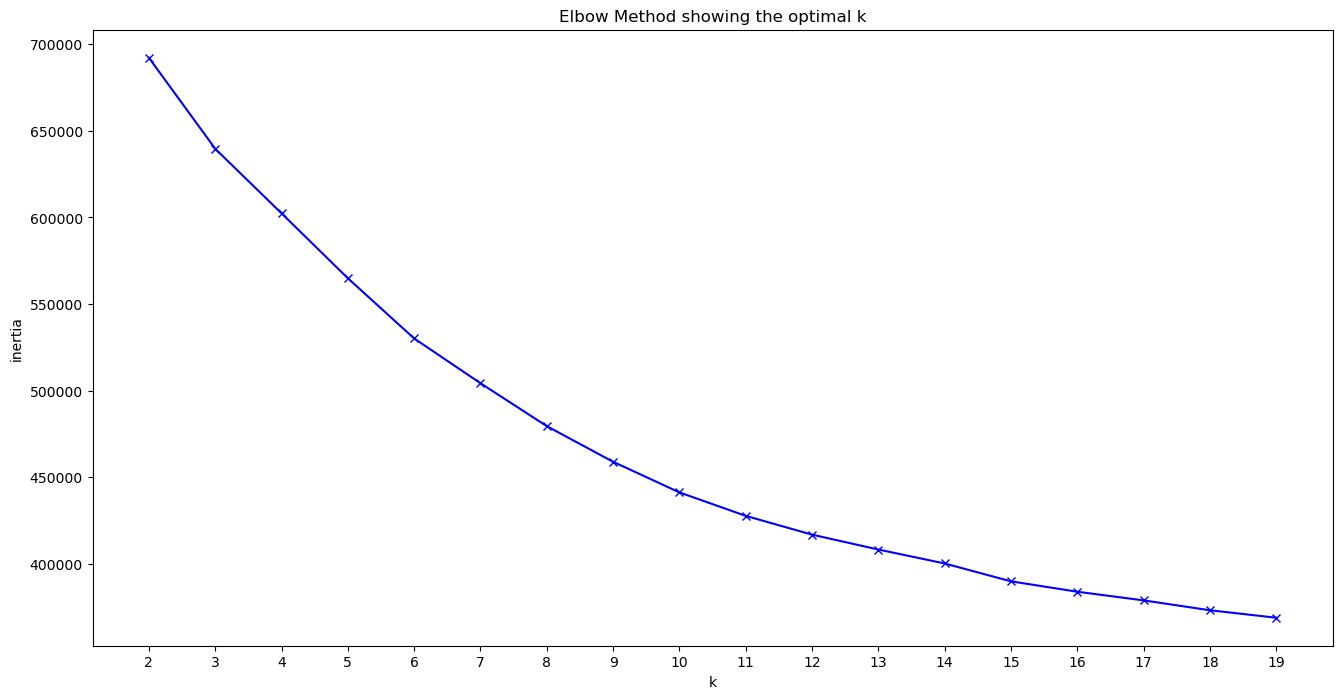

In [63]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_init = 10, n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

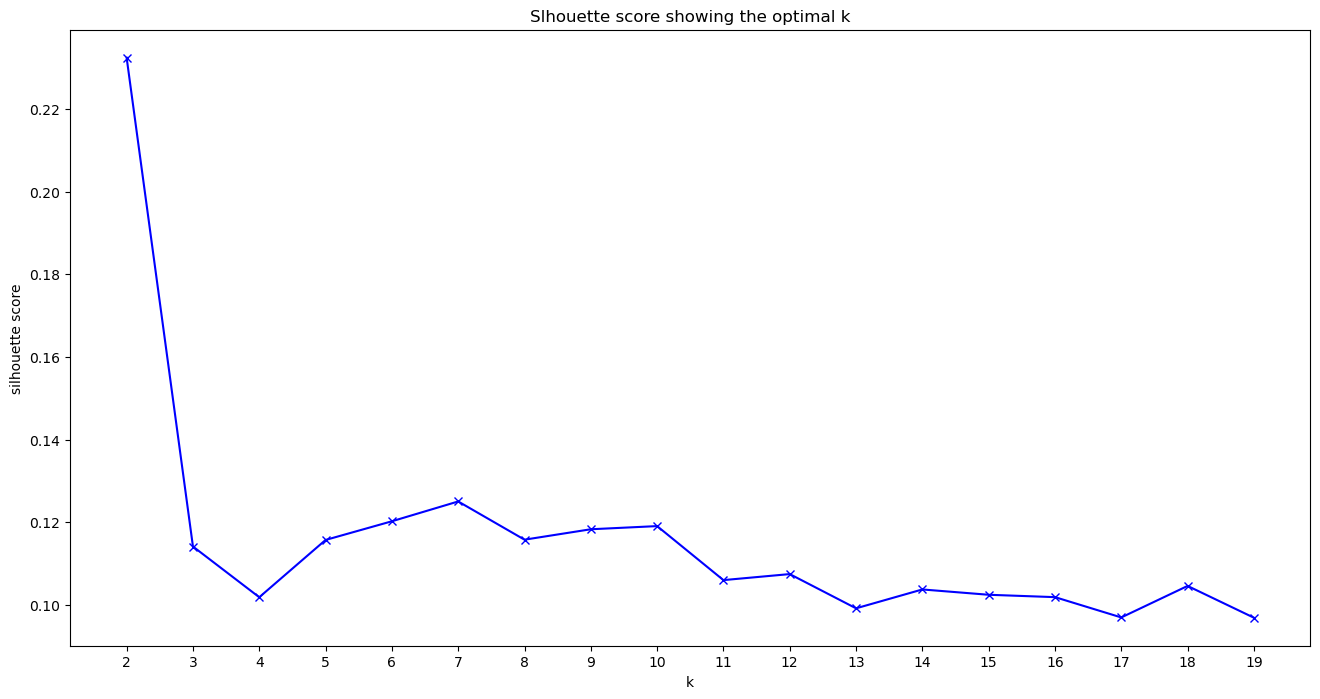

In [64]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_init = 10, n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

### Choosing the cluster number using K-means
Based on inertia and the silhouette score, the number of clusters is either 9 or 10

In [66]:
num_clusters = 10
kmeans = KMeans(n_init = 10, n_clusters=num_clusters, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=10, n_init=10, random_state=1234)

In [67]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     3585
1     7587
2     4320
3     8860
4     2626
5    12365
6     7636
7      397
8       99
9    14256
Name: count, dtype: int64

In [68]:
clusters

array([5, 9, 5, ..., 5, 5, 5], dtype=int32)

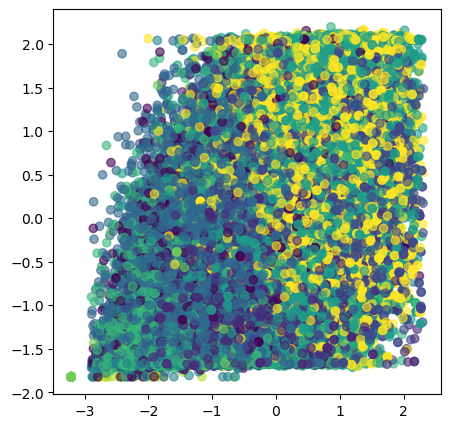

In [69]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 9], c=clusters,alpha=0.6)
plt.show()

In [70]:
%%time
kmeans = KMeans(n_clusters=10,
                init="random",
                n_init= 1,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

474959.1332581594
CPU times: user 175 ms, sys: 23.8 ms, total: 199 ms
Wall time: 44.2 ms


In [74]:
spotify_w_audio_ft['cluster'] = clusters

In [75]:
spotify_w_audio_ft['song_and_artist'] = spotify_w_audio_ft['track.name'] + " by " + spotify_w_audio_ft['name']

In [78]:
spotify_w_audio_ft.shape

(61731, 23)

In [79]:
spotify_with_cluster = spotify_w_audio_ft[['song_and_artist', 'cluster']]
#spotify_with_cluster

,song_and_artist,cluster
0,If I Ever Feel Better by Phoenix,5
1,Dance To The Underground by Radio 4,9
2,How We Do by Mount Sims,5
3,Fuck the Pain Away by Peaches,9
4,Street Surgery 2 by Zongamin,2
...,...,...
61726,deja vu by Olivia Rodrigo,3
61727,WHOLE LOTTA MONEY by BIA,2
61728,Slumber Party (feat. Princess Nokia) by Ashnikko,5
61729,Slumber Party (feat. Princess Nokia) by Prince...,5


In [80]:
import pickle
pickle.dump(kmeans, open('kmean.pkl', 'wb'))
pickle.dump(transformer, open('scaler.pkl', 'wb'))

In [81]:
type(transformer)

sklearn.preprocessing._data.StandardScaler

In [82]:
spotify_with_cluster.to_csv("spotify_with_cluster.csv", index=False)